<a href="https://colab.research.google.com/github/dakyommii/study/blob/main/test/opencvFaceSwap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###import

In [1]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

#OpenCv is the main librarie of image manipulation
!pip install opencv-python
import cv2
import numpy as np
import dlib

#to visualize the images with better quality
import os
from IPython.display import Image

#to import from website
!pip install wget
import wget

print('ready!')


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=ab03e07841afff8cae4a0936307dd3cab854370c86fa7d6d051e94de58bb9ef2
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
ready!


###pattern files

In [2]:
pattern='/content/drive/MyDrive/tiger2fork/shape_predictor_68_face_landmarks.dat'

###load images

###transform images

###detecting face landmark


In [3]:
####
url='https://files.alerta.rcnradio.com/alerta_bogota/public/styles/article_desktop/public/2019-10/el_man_0.jpg?itok=wWjcWmPw'
wget.download(url, 'sa.jpg')
url2='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Scarlett_Johansson_in_Kuwait_01b-tweaked.jpg/220px-Scarlett_Johansson_in_Kuwait_01b-tweaked.jpg'
wget.download(url2, 'sj.jpg')
print('Images Downloaded!')

Images Downloaded!


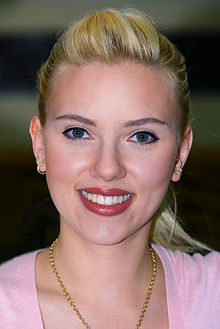

In [4]:
img1 = cv2.imread("./sj.jpg") 
Image("./sj.jpg")

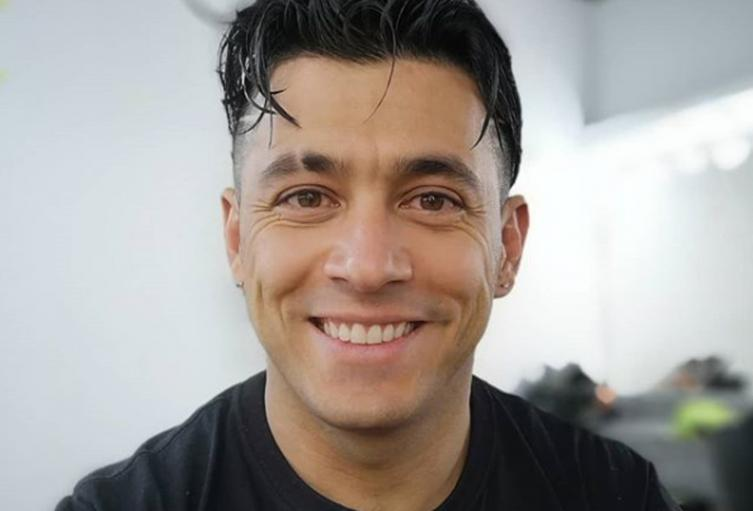

In [5]:
img2 = cv2.imread("./sa.jpg") 
Image("./sa.jpg")

<function matplotlib.pyplot.show>

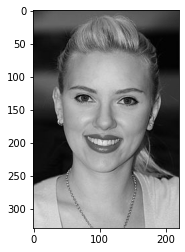

In [6]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img1_gray)
plt.imshow(img1_gray, cmap='gray')
plt.show 

<function matplotlib.pyplot.show>

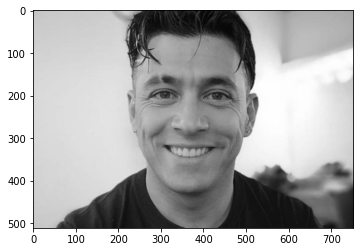

In [7]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2_gray, cmap='gray')
plt.show

In [9]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pattern)
faces = detector(img1_gray)
for face in faces:
    landmarks = predictor(img1_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))

print('next')

next


In [10]:
points = np.array(landmarks_points, np.int32)
convexhull = cv2.convexHull(points)
print('next')

next


In [11]:
faces2 = detector(img2_gray)
for face in faces2:
  landmarks = predictor(img2_gray, face)
  landmarks_points2 = []
  for n in range(0, 68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    landmarks_points2.append((x, y))
    #cv2.circle(img2, (x, y), 3, (0, 255, 0), -1) #This line help to print landmarks in the face
    
print('next')

next


In [12]:
points2 = np.array(landmarks_points2, np.int32)
convexhull2 = cv2.convexHull(points2)
print('next')

next


In [13]:
rect = cv2.boundingRect(convexhull)#find the rectangle sourrounding convex hull
subdiv = cv2.Subdiv2D(rect)
subdiv.insert(landmarks_points)
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)
for t in triangles:
   pt1 = (t[0], t[1])
   pt2 = (t[2], t[3])
   pt3 = (t[4], t[5])
   #cv2.line(img, pt1, pt2, (0, 0, 255), 2) #this unselected lines help o vizualize the triangles 
   #cv2.line(img, pt2, pt3, (0, 0, 255), 2) #on the face
   #cv2.line(img, pt3, pt1, (0, 0, 255), 2)

print('next')

next


<function matplotlib.pyplot.show>

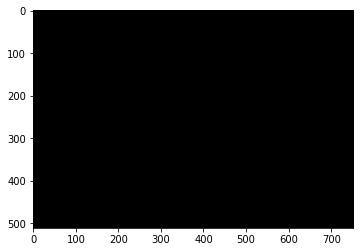

In [14]:
img2_new_face = np.zeros_like(img2)
plt.imshow(img2_new_face)
plt.show

In [15]:
def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index
print('next')

next


In [16]:
indexes_triangles = []
for t in triangles:
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        index_pt1 = np.where((points == pt1).all(axis=1))
        index_pt1 = extract_index_nparray(index_pt1)
        index_pt2 = np.where((points == pt2).all(axis=1))
        index_pt2 = extract_index_nparray(index_pt2)
        index_pt3 = np.where((points == pt3).all(axis=1))
        index_pt3 = extract_index_nparray(index_pt3)
        if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
            triangle = [index_pt1, index_pt2, index_pt3]
            indexes_triangles.append(triangle)
        #cv2.line(img, pt1, pt2, (0, 0, 255), 2)
        #cv2.line(img, pt2, pt3, (0, 0, 255), 2)
        #cv2.line(img, pt1, pt3, (0, 0, 255), 2)
print('next')


next


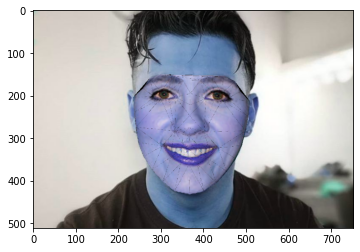

In [17]:
# Triangulation of both faces
for triangle_index in indexes_triangles:
    # Triangulation of the first face
    tr1_pt1 = landmarks_points[triangle_index[0]]
    tr1_pt2 = landmarks_points[triangle_index[1]]
    tr1_pt3 = landmarks_points[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)

    rect1 = cv2.boundingRect(triangle1)
    (x, y, w, h) = rect1
    cropped_triangle = img1[y: y + h, x: x + w]
    cropped_tr1_mask = np.zeros((h, w), np.uint8)
    points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                      [tr1_pt2[0] - x, tr1_pt2[1] - y],
                      [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)
    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
    cropped_triangle = cv2.bitwise_and(cropped_triangle, cropped_triangle,
                                       mask=cropped_tr1_mask)
    #cv2.line(img, tr1_pt1, tr1_pt2, (0, 0, 255), 2)
    #cv2.line(img, tr1_pt3, tr1_pt2, (0, 0, 255), 2)
    #cv2.line(img, tr1_pt1, tr1_pt3, (0, 0, 255), 2)

     # Triangulation of second face
    tr2_pt1 = landmarks_points2[triangle_index[0]]
    tr2_pt2 = landmarks_points2[triangle_index[1]]
    tr2_pt3 = landmarks_points2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)
    rect2 = cv2.boundingRect(triangle2)
    (x, y, w, h) = rect2
    cropped_triangle2 = img2[y: y + h, x: x + w]
    cropped_tr2_mask = np.zeros((h, w), np.uint8)
    points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                       [tr2_pt2[0] - x, tr2_pt2[1] - y],
                       [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)
    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)
    cropped_triangle2 = cv2.bitwise_and(cropped_triangle2, cropped_triangle2,
                                       mask=cropped_tr2_mask)
    #cv2.line(img2, tr2_pt1, tr2_pt2, (0, 0, 255), 2)
    #cv2.line(img2, tr2_pt3, tr2_pt2, (0, 0, 255), 2)
    #cv2.line(img2, tr2_pt1, tr2_pt3, (0, 0, 255), 2)
    
    # Let's Warp triangles
    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)##

    # *****Reconstructing destination face************************************************
    img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
    img2_new_face_rect_area_gray= cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)

    #To remove the lines between triangles
    _, mask_triangles_designed=cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle=cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
    img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area

    # Face swapped (putting 1st face into 2nd face)
    img2_face_mask = np.zeros_like(img2_gray)
    img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
    img2_face_mask = cv2.bitwise_not(img2_head_mask)

    img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
    result = cv2.add(img2_head_noface, img2_new_face)

    #plt.imshow(img2_new_face)
    plt.imshow(result)


In [19]:
img2_new_face_g = cv2.cvtColor(img2_new_face, cv2.COLOR_BGR2GRAY)
img2_new_face_g = cv2.cvtColor(img2_new_face_g, cv2.COLOR_GRAY2BGR)

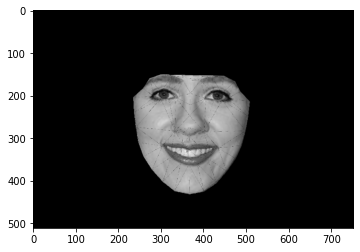

In [20]:
plt.imshow(img2_new_face_g)

In [22]:
img2_head_noface_g = cv2.cvtColor(img2_head_noface, cv2.COLOR_BGR2GRAY)
img2_head_noface_g = cv2.cvtColor(img2_head_noface_g, cv2.COLOR_GRAY2BGR)

<function matplotlib.pyplot.show>

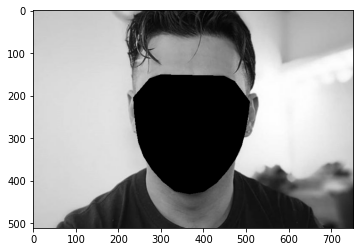

In [23]:
plt.imshow(img2_head_noface_g)
plt.show

In [24]:
(x, y, w, h) = cv2.boundingRect(convexhull2)
center_face2 = (int((x + x + w)/2), int((y + y + h)/2))
seamlessclone= cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.MIXED_CLONE)

In [26]:
seamlessclone_g = cv2.cvtColor(seamlessclone, cv2.COLOR_BGR2GRAY)
seamlessclone_g = cv2.cvtColor(seamlessclone_g, cv2.COLOR_GRAY2BGR)

<function matplotlib.pyplot.show>

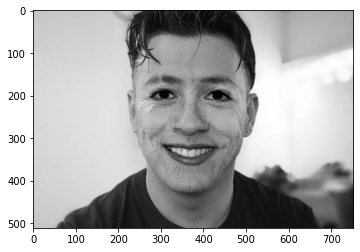

In [27]:
plt.imshow(seamlessclone_g)
plt.show